In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("emails.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB
None


In [3]:
import os
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [13]:
out = None
a = 0
for emails in pd.read_csv('C:/Users/mesut/OneDrive/Masaüstü/python/Python ile Yapay Zeka Projeleri/yeni/csv/emails.csv', chunksize = 10000):
    if out is None:
        out = emails.copy()
    else:
        out.append(emails)

In [14]:
print(out.shape)

(10000, 2)


In [30]:
print(out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   file     10000 non-null  object
 1   message  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
None


In [15]:
# extract to, from and body from each email
def email_parsing(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [16]:
# compile all extracted data into a single dictionary
def emails_parsing(messages):
    emails = [email_parsing(message) for message in messages]
    return {
        'body': result_append(emails, 'body'), 
        'to': result_append(emails, 'to'), 
        'from_': result_append(emails, 'from')
    }

In [17]:
# append all key results into single list
def result_append(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append('')
        else:
            results.append(email[key])
    return results

In [18]:
# create a new dataframe for extracted data
extracted_data = pd.DataFrame(emails_parsing(out['message']))

In [19]:
extracted_data.head()

,body,to,from_
0,Here is our forecast,tim.belden@enron.com,phillip.allen@enron.com
1,Traveling to have a business meeting takes the...,john.lavorato@enron.com,phillip.allen@enron.com
2,test successful. way to go!!!,leah.arsdall@enron.com,phillip.allen@enron.com
3,"Randy,Can you send me a schedule of the salary...",randall.gay@enron.com,phillip.allen@enron.com
4,,greg.piper@enron.com,phillip.allen@enron.com


In [20]:
type(extracted_data)

pandas.core.frame.DataFrame

In [44]:
stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vect = TfidfVectorizer(analyzer = 'word', stop_words = stopwords, max_df = 0.5, min_df = 2)


In [45]:
X = vect.fit_transform(extracted_data.body)

In [46]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


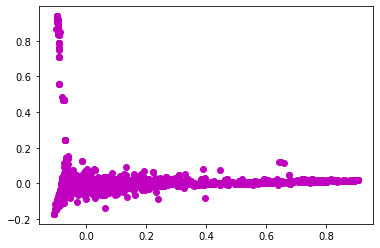

In [47]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c = 'm')

In [48]:
xm = pd.DataFrame(X)

In [50]:
xm.head(10)

,0
0,"(0, 19325)\t1.0"
1,"(0, 42426)\t0.05413731530711461\n (0, 19188..."
2,"(0, 45169)\t0.42657797268448\n (0, 39893)\t..."
3,"(0, 32563)\t0.1368025783529291\n (0, 18061)..."
4,
5,"(0, 42349)\t0.5316257606057639\n (0, 43587)..."
6,"(0, 21703)\t0.29834709233582446\n (0, 25987..."
7,
8,"(0, 5607)\t0.2564661685036661\n (0, 23863)\..."
9,"(0, 2925)\t0.08592743889865732\n (0, 3615)\..."
